In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib

olympics = pd.read_csv('athlete_events.csv')
noc = pd.read_csv('noc_regions.csv')

In [4]:
display(olympics.head())
display(noc.head())

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


## A)
Hur många länder är med i datan?

In [5]:
print(f'Det finns {noc['NOC'].nunique()} länder.')

Det finns 230 länder.


## B)
Vilka länder är med? (förkortningarna räcker)

In [6]:
countries = noc['NOC'].dropna().unique()
countries

array(['AFG', 'AHO', 'ALB', 'ALG', 'AND', 'ANG', 'ANT', 'ANZ', 'ARG',
       'ARM', 'ARU', 'ASA', 'AUS', 'AUT', 'AZE', 'BAH', 'BAN', 'BAR',
       'BDI', 'BEL', 'BEN', 'BER', 'BHU', 'BIH', 'BIZ', 'BLR', 'BOH',
       'BOL', 'BOT', 'BRA', 'BRN', 'BRU', 'BUL', 'BUR', 'CAF', 'CAM',
       'CAN', 'CAY', 'CGO', 'CHA', 'CHI', 'CHN', 'CIV', 'CMR', 'COD',
       'COK', 'COL', 'COM', 'CPV', 'CRC', 'CRO', 'CRT', 'CUB', 'CYP',
       'CZE', 'DEN', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'ERI', 'ESA',
       'ESP', 'EST', 'ETH', 'EUN', 'FIJ', 'FIN', 'FRA', 'FRG', 'FSM',
       'GAB', 'GAM', 'GBR', 'GBS', 'GDR', 'GEO', 'GEQ', 'GER', 'GHA',
       'GRE', 'GRN', 'GUA', 'GUI', 'GUM', 'GUY', 'HAI', 'HKG', 'HON',
       'HUN', 'INA', 'IND', 'IOA', 'IRI', 'IRL', 'IRQ', 'ISL', 'ISR',
       'ISV', 'ITA', 'IVB', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ',
       'KIR', 'KOR', 'KOS', 'KSA', 'KUW', 'LAO', 'LAT', 'LBA', 'LBR',
       'LCA', 'LES', 'LIB', 'LIE', 'LTU', 'LUX', 'MAD', 'MAL', 'MAR',
       'MAS', 'MAW',

## C) 
Vilka sporter är med?

In [7]:
n_sports = olympics['Sport'].nunique()
sports = pd.DataFrame({'Sport': sorted(olympics['Sport'].unique())})
sports

,Sport
0,Aeronautics
1,Alpine Skiing
2,Alpinism
3,Archery
4,Art Competitions
...,...
61,Tug-Of-War
62,Volleyball
63,Water Polo
64,Weightlifting


## D) 
Vilka medaljtyper finns det?

In [26]:
medal = olympics["Medal"].dropna().value_counts()
medals = pd.DataFrame(medal)
medals

,count
Medal,
Gold,13372
Bronze,13295
Silver,13116


## E)
Ta reda på statistik för åldern: medelvärde, median, min, max, standardavvikelse.

In [44]:
stat = olympics["Age"].agg(["mean", "std", "min", "median", "max"]).round(1)
all_stat = pd.DataFrame(stat)
all_stat


,Age
mean,25.6
std,6.4
min,10.0
median,24.0
max,97.0


## F)
## *Utforska datan vidare med egna frågor*

### Samuel:

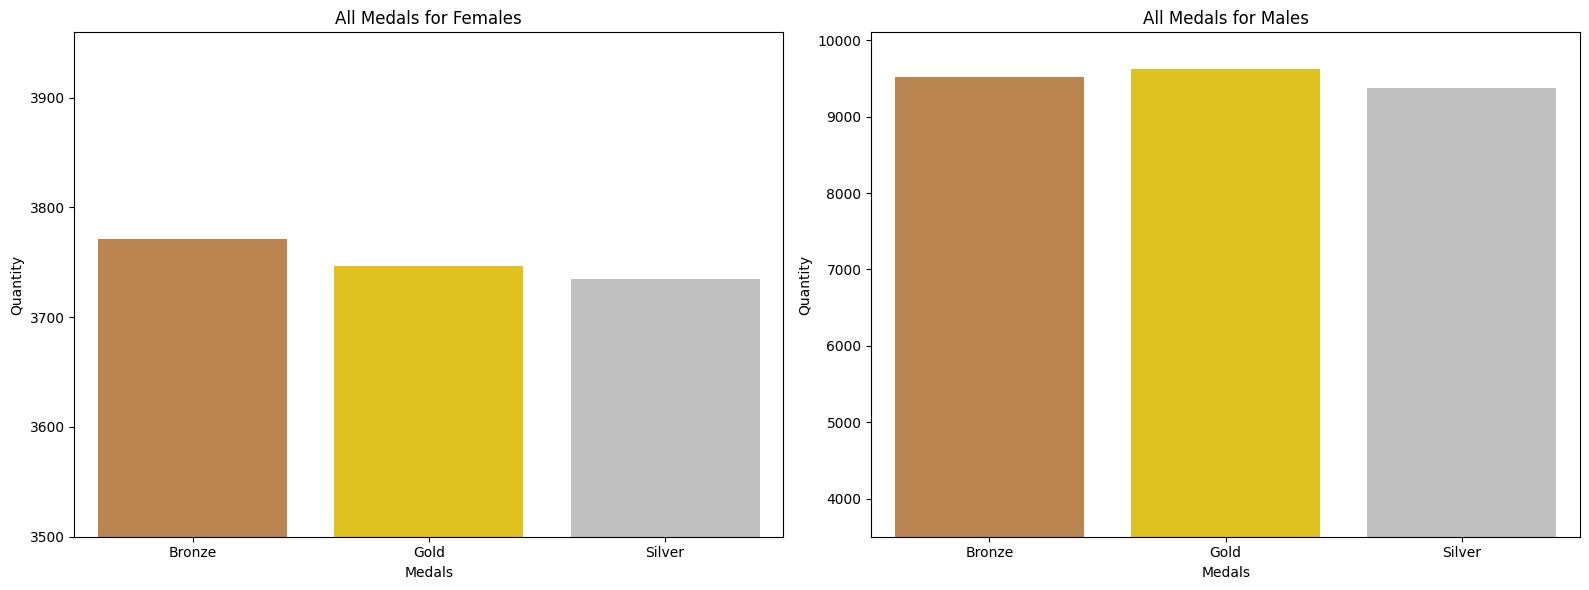

In [ ]:
medals_males = olympics[olympics["Sex"] == "M"].groupby("Medal").size().reset_index(name = "Quantity")
medals_females = olympics[olympics["Sex"] == "F"].groupby("Medal").size().reset_index(name = "Quantity")

medals_males["Sex"] = "Male"
medals_females["Sex"] = "Female"

fig, axes = plt.subplots(1, 2, figsize = (16, 6))

sns.barplot(x = "Medal", y = "Quantity", hue = "Medal", palette = {"Gold": "gold", "Silver": "silver", "Bronze": "peru"}, data = medals_females, ax = axes[0])
axes[0].set_title("All Medals for Females")
axes[0].set_xlabel("Medals")
axes[0].set_ylabel("Quantity")
axes[0].set_ylim(3500)

sns.barplot(x = "Medal", y = "Quantity", hue = "Medal", palette = {"Gold": "gold", "Silver": "silver", "Bronze": "peru"}, data = medals_males, ax = axes[1])
axes[1].set_title("All Medals for Males")
axes[1].set_xlabel("Medals")
axes[1].set_ylabel("Quantity")
axes[1].set_ylim(3500)

plt.tight_layout()
plt.show()


## **Sebbe:**  Sveriges sporter med flest medaljer

In [374]:
sweden = olympics[olympics['NOC'] == 'SWE'][['Sport', 'Medal']].dropna(subset=['Medal'])
sweden_medals = sweden.groupby(['Sport', 'Medal']).size().unstack(fill_value=0)
sweden_medals['Total'] = sweden_medals[['Bronze', 'Silver', 'Gold']].sum(axis=1)
top10 = sweden_medals.sort_values(by='Total', ascending=False).head(10)
top10


Medal,Bronze,Gold,Silver,Total
Sport,,,,
Ice Hockey,99,46,72,217
Athletics,61,32,35,128
Shooting,40,32,54,126
Cross Country Skiing,39,54,30,123
Sailing,35,33,45,113
Gymnastics,1,95,7,103
Wrestling,31,28,27,86
Equestrianism,24,37,24,85
Swimming,35,9,26,70


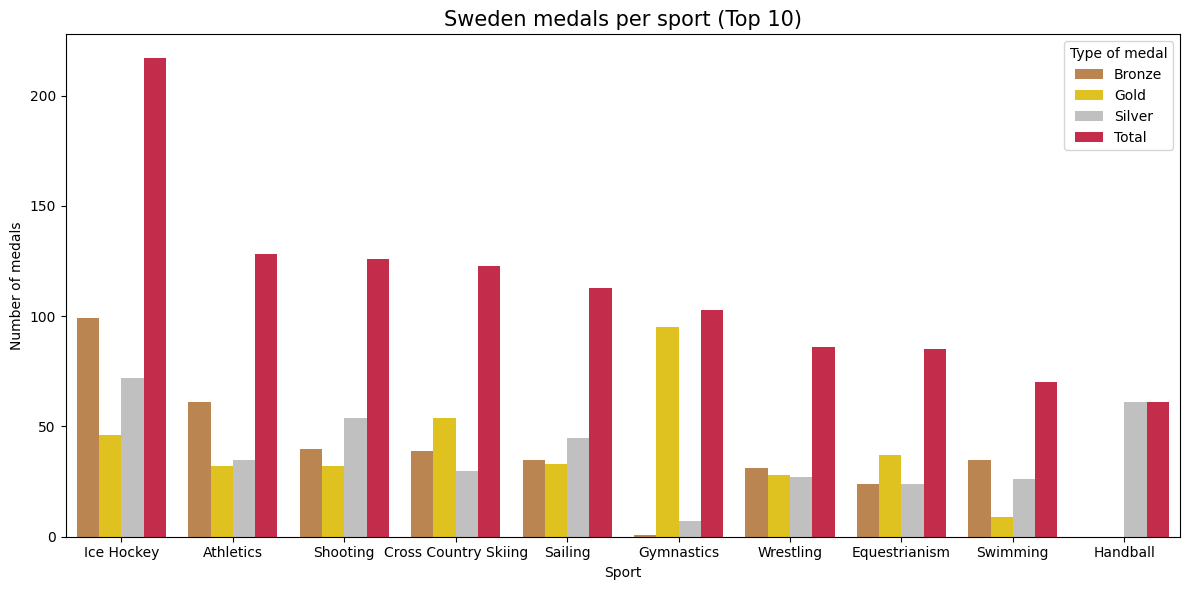

In [375]:
df_melted = top10.reset_index().melt(id_vars='Sport', var_name='Medal', value_name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Sport', y='Count', hue='Medal', palette = {'Gold' : 'gold', 'Silver' : 'silver', 'Bronze' : 'peru', 'Total':'crimson'})

plt.title('Sweden medals per sport (Top 10)', fontsize= 15)
plt.xlabel('Sport', fontsize=10)
plt.ylabel('Number of medals', fontsize=10)
plt.legend(title='Type of medal')
plt.tight_layout()


## G)

Text(0.5, 1.0, 'Könsfördelning i OS')

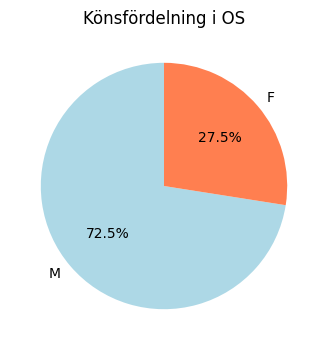

In [379]:
Sex_counts = olympics['Sex'].value_counts()

plt.figure(figsize=(8,4))
plt.pie(Sex_counts, labels = Sex_counts.index, startangle=90, autopct='%1.1f%%', colors = ['lightblue', 'coral'])
plt.title('Könsfördelning i OS')

# Uppgift 1

In [9]:
germany = olympics[olympics['NOC'] == 'GER'].copy()

germany['Name'] = germany['Name'].apply(
    lambda x:
        hashlib.sha256(x.encode()).hexdigest()
)
germany = germany.rename(columns={'Name' : 'Hash_Names'}).reset_index(drop=True)
germany.head()

,ID,Hash_Names,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,133,341116996c59575b8e0a66ad3d42f5063c72c9d5fd8840...,M,NaN,NaN,NaN,Germany,GER,1900 Summer,1900,Summer,Paris,Gymnastics,Gymnastics Men's Individual All-Around,NaN
1,389,0740975bf9235edebcecc325eeff6e611f13de55abfc11...,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
2,389,0740975bf9235edebcecc325eeff6e611f13de55abfc11...,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
3,396,1acabc3b523678f8cd7b07dd38a5a0808f8d799b0a52c0...,F,25.0,165.0,55.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Individual All-Around,NaN
4,396,1acabc3b523678f8cd7b07dd38a5a0808f8d799b0a52c0...,F,25.0,165.0,55.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,NaN


In [10]:
german_medals = germany[(germany["Medal"].notna())]
medals_per_sport = german_medals.groupby("Sport")["Medal"].count().reset_index()
top10 = medals_per_sport.sort_values(by='Medal', ascending= False).reset_index(drop=True).head(10)

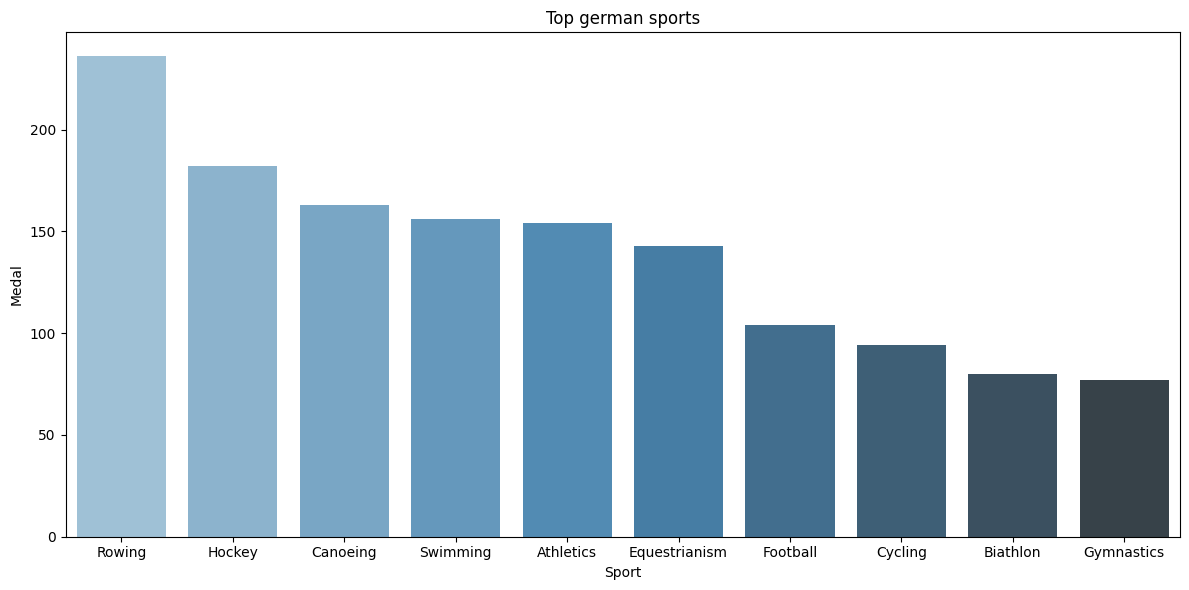

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(data=top10, x = 'Sport', y = 'Medal', hue='Sport', palette='Blues_d')
plt.title('Top german sports')
plt.tight_layout()